In [1]:
import numpy as np
import scipy.signal
from matplotlib import pyplot as plt

In [2]:
np.random.seed(256)  # for reproducibility

In [3]:
# Criação de um sinal de onda senoidal com ruído gaussiano
# create time steps and corresponding sine wave with Gaussian noise
fs = 30  # sampling rate, Hz
ts = np.arange(0, 8, 1.0 / fs)  # time vector - 8 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0.5 * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

yraw.shape

(240,)

In [4]:
# Detecção de picos no sinal curto
# - Seleciona os primeiros 75 pontos do sinal e utiliza a função find_peaks para detectar os picos do sinal
nshort = 75
tshort, yrawshort, yshort = ts[:nshort], yraw[:nshort], ys[:nshort]
short_peaks, _ = scipy.signal.find_peaks(yrawshort)
short_peaks_nonoise, _ = scipy.signal.find_peaks(yshort)

tshort.shape, yrawshort.shape, yshort.shape, short_peaks.shape, short_peaks_nonoise.shape

((75,), (75,), (75,), (23,), (3,))

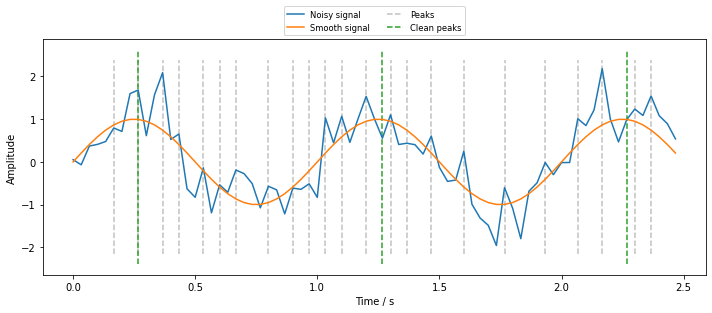

In [16]:
# Plotagem do sinal curto e picos
plt.figure(figsize=[10, 4])
plt.plot(tshort, yrawshort, label="Noisy signal")
plt.vlines(tshort[short_peaks], *plt.ylim(), label="Peaks",
           color=".2", alpha=0.3, ls="--")

plt.plot(tshort, yshort, label="Smooth signal")
plt.vlines(tshort[short_peaks_nonoise], *plt.ylim(), label="Clean peaks",
           color="C2", ls="--")
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")
# plt.savefig("basic-peaks.png", dpi=120)

In [6]:
# Filtragem do sinal raw usando filtro passabanda
sos = scipy.signal.iirfilter(2, Wn=[0.1, 2.5], fs=fs, btype="bandpass",
                             ftype="butter", output="sos")
yfilt = scipy.signal.sosfiltfilt(sos, yraw)

In [7]:
# Detecta picos no sinal filtrado
peaks, props = scipy.signal.find_peaks(yfilt, distance=0.35*fs, height=0.0)
cwt_peaks = scipy.signal.find_peaks_cwt(yraw, widths=np.arange(5, 15))
# peaks, props = scipy.signal.find_peaks(yraw)  # , distance=0.4*fs)

# Calcula as Frequencias cardiacas médias em bpm
hr_bpm_cwt = 60 / np.mean(np.diff(ts[cwt_peaks]))
hr_bpm = 60 / np.mean(np.diff(ts[peaks]))
print(f"find_peaks: {hr_bpm:.3f} bpm, findpeaks_cwt: {hr_bpm_cwt:.3f} bpm")

find_peaks: 60.000 bpm, findpeaks_cwt: 60.000 bpm


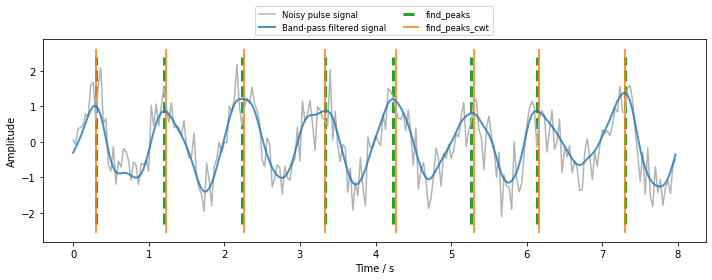

In [13]:
# plot signals and peaks
plt.figure(figsize=[10, 4])
plt.plot(ts, yraw, color=".7", label="Noisy pulse signal")
plt.plot(ts, yfilt, color="C0", alpha=0.8, lw=2,
         label="Band-pass filtered signal")
plt.vlines(ts[peaks], *plt.ylim(), color="C2", lw=3, ls="dashed",
           label="find_peaks")
plt.vlines(ts[cwt_peaks], *plt.ylim(), color="C1", alpha=0.8, lw=2,
           label="find_peaks_cwt")

plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")
plt.tight_layout()
# plt.savefig("find-peaks.png", dpi=120)
plt.show()